После знакомых вам шагов подготовки датасета, а именно очистки, анализа, проектирования признаков и их преобразования, дата-сайентисты приступают к обучению модели. Для этого необходимо разделить датафрейм, создать, обучить и оценить качество модели.

In [36]:
# importing pandas
import pandas as pd

In [37]:
# downloading the table
hotels = pd.read_csv('hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


Сколько уникальных названий отелей представлено в наборе данных?

In [39]:
# определяем количество уникальных названий отелей
unique_values_count = hotels['hotel_name'].nunique()

print(f"Количество уникальных значений: {unique_values_count}")


Количество уникальных значений: 1492


Ответьте на вопросы о дате размещения отзывов.

In [41]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')
fresh_date = hotels['review_date'].max()
earliest_date = hotels['review_date'].min()

# Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.
print(f"Самый свежий отзыв был оставлен: {fresh_date}")
# Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.
print(f"Cамый первый отзыв был оставлен: {earliest_date}")

Самый свежий отзыв был оставлен: 2017-08-03 00:00:00
Cамый первый отзыв был оставлен: 2015-08-04 00:00:00


Сколько уникальных тегов представлено в наборе данных?

In [56]:
import re
# Функция для очистки тегов
def clean_tags(tag_list):
    clean_tag_list = []
    for tag in tag_list:
        # Удаление лишних кавычек и пробелов в начале и конце каждого тега
        clean_tag = re.sub(r"[\'\[\]]", "", tag).strip()
        clean_tag_list.append(clean_tag)
    return clean_tag_list

# Применение функции к столбцу tags
hotels['cleaned_tags'] = hotels['tags'].apply(clean_tags)

# Объединение всех списков тегов в один
all_tags = [tag for sublist in hotels['cleaned_tags'] for tag in sublist]

# Вычисление уникальных тегов
unique_tags = set(all_tags)

print(f"Количество уникальных тегов: {len(unique_tags)}")
print(f"Уникальные теги: {unique_tags}")



Количество уникальных тегов: 2368
Уникальные теги: {'Standard Double Room with Terrace', 'Horizon Suite with Dock View', 'Basic Double or Twin Room', 'Premium Twin Room', 'Superior Double Room with Sofa Bed and Pool View', 'Double Deluxe Room', 'Business Room', 'Quality Double or Twin Room', 'Superior Guest room 1 King or 2 Twin Single Bed s', 'Double Twin Rooms Next to Each Other', 'Executive Queen Room with Lounge Access', 'King Executive Waterfront with Access to Executive Lounge', 'Deluxe Double Room with Balcony and Free Pool Access', 'Junior Suite with Gallery View', 'Classic Double or Twin Room', 'Comfort Double or Twin Room with Rambla View', 'Queen Room', 'Two Bedroom Family Joining Suite with Mobile Phone 2 adults 3 children', 'Special Offer Double or Twin Room with Parking', 'Prestige Suite with Private Terrace', 'Comfort Single Room with Shower', 'King Hilton Sea View', 'King Atrium Suite with Lounge Access', 'Single Guest Room', 'Privilege Junior Suite with Spa Access', 'E

Какой тег представлен в наибольшем числе отзывов?

In [57]:
from collections import Counter
# Подсчет количества каждого тега
tag_counts = Counter(all_tags)

# Определение самого частого тега
most_common_tag, most_common_count = tag_counts.most_common(1)[0]

print(f"Самый частый тег: {most_common_tag}, встречается в {most_common_count} строках")


Самый частый тег: Leisure trip, встречается в 313593 строках


Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.

In [60]:
from collections import Counter
# Подсчет количества каждого тега
tag_counts = Counter(all_tags)

# Преобразование в DataFrame для лучшей визуализации
tag_counts_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Сортировка по количеству
tag_counts_df.sort_values(by='Count', ascending=False, inplace=True)

print(tag_counts_df)


                                    Tag   Count
0                          Leisure trip  313593
4        Submitted from a mobile device  230778
1                                Couple  189212
7                        Stayed 1 night  145373
3                       Stayed 2 nights  100263
...                                 ...     ...
2115             Studio with Spa Access       1
1024                Comfort Family Room       1
2112             Junior Suite Free Wifi       1
977                        Design Suite       1
2367  Executive Double Room Non Smoking       1

[2368 rows x 2 columns]


РАЗДЕЛЕНИЕ НАБОРА ДАННЫХ

Прежде всего, для создания модели необходимо разделить датафрейм на набор данных, X которые мы будем использовать для обучения модели, именуемый , и на целевую переменную — величину, значение которой мы будем предсказывать, Y (в нашем случае это рейтинг отелей).

In [61]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

Для начала разделим признаки по типу, перечислим их:

In [62]:
# непрерывные признаки
num_cols = ['additional_number_of_scoring', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given']

# категориальные признаки
cat_cols = ['review_date', 'days_since_review', 'average_score', 'reviewer_nationality', 'lat', 'lng']

Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. Метод возвращает массив значений хи-квадрат и p-value для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

In [63]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

TypeError: float() argument must be a string or a real number, not 'Timestamp'

Добавьте и другие категориальные признаки в список cat_cols, чтобы оценить их значимость в определении рейтинга отеля.

Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn. В основе метода оценки значимости переменных лежит изученный вами в юнитах по статистике анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).

Метод возвращает двумерный массив f-статистик и p-value для каждого признака. В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.

<Axes: >

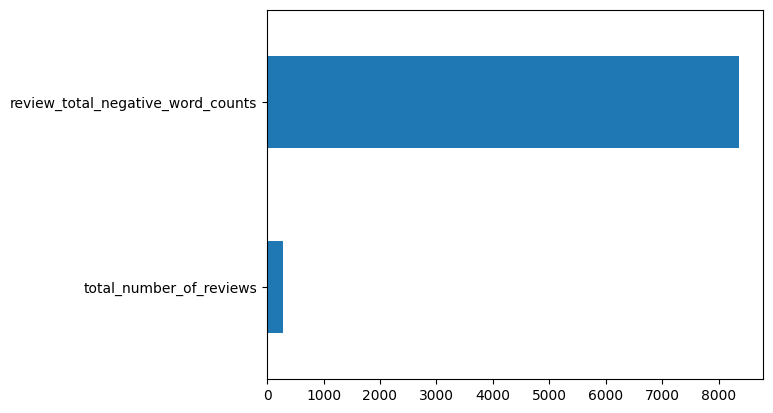

In [14]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Добавьте и другие непрерывные признаки в список num_cols, чтобы оценить их значимость в определении рейтинга отеля.

Результаты данных тестов вы сможете использовать в своих исследования при отборе признаков: удаляйте менее значимые признаки и сравнивайте результаты качества полученных моделей.

→ Тесты chi2 и f_classif можно использовать для выбора n заданных признаков с наивысшими значениями статистик с помощью метода SelectKBest. Подробнее об этом вы можете прочесть в руководстве https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection.

In [5]:
display(y)

0         10.0
1          6.3
2          7.5
3         10.0
4          9.6
          ... 
386798     8.8
386799     9.2
386800     8.3
386801     9.2
386802     8.8
Name: reviewer_score, Length: 386803, dtype: float64

Далее каждый из полученных наборов мы делим на тренировочный (train, используется для обучения модели) и тестовый (test, используется для оценки точности модели). Такое деление осуществляется с помощью специального метода train_test_split() библиотеки sklearn. В параметрах метода (параметр test_size) мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели. В нашем коде эта часть составляет 25 %, или 0.25.

In [6]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [7]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ

Сам процесс создания и тестирования модели занимает всего четыре строчки кода. В качестве алгоритма мы будем использовать популярный и довольно мощный алгоритм [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Он реализован в библиотеке sklearn.

In [8]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


ОЦЕНКА КАЧЕСТВА МОДЕЛИ

Для оценки качества модели — точности прогнозов, сделанных моделью, — мы будем использовать метрику (некий числовой показатель), которая называется MAPE (mean absolute percentage error), средняя абсолютная процентная ошибка. Эту метрику очень легко интерпретировать. Если у вас MAPE = 11.4 %, то это говорит о том, что ошибка составила 11.4 % от фактических значений.

где y_true — фактические значения прогноза, a y_pred — предсказанные.

Для расчета MAPE сравним предсказанные нашей моделью значения с реальными и посмотрим на значение ошибки.

In [9]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14141054546226425
